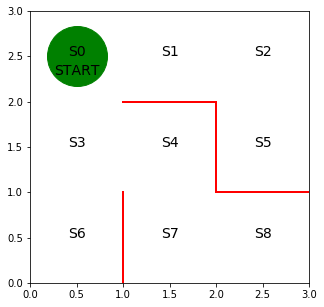

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
# Usage:
# plt.plot([x], [y], color='red', linewidth=2)

plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)


# 状態を示す文字を描く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', size=14, ha='center')


# 描画範囲の設定とメモリの削除
ax.set_xlim(0,  3)
ax.set_ylim(0,  3)

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [2.5], marker="o", color="g", markersize=60)


In [36]:
# 初期の方策を決定するパラメータtheta_0 を設定

# 行は状態0 ~ 7, 列は移動方向で↑、→、↓、←を表す
# 例 s0の場合は→、↓のみ移動可能
theta_0 = np.array([
    [np.nan, 1, 1, np.nan], # s0
    [np.nan, 1, np.nan, 1], #s1
    [np.nan, np.nan, 1, 1], #s2
    [1, 1, 1, np.nan], #s3
    [np.nan, np.nan, 1, 1], #s4
    [1, np.nan, np.nan, np.nan], #s5
    [1, np.nan, np.nan, np.nan], #s6
    [1, 1, np.nan, np.nan], #s7
    [np.nan, np.nan, np.nan, 1], #s8
])

# ポリシーtheta を行動ポリシーpiに変換する関数の定義
def simple_convert_into_pi_from_theta(theta):
    # 割合の計算
    [m, n] = theta.shape # thetaの行列サイズ
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :]) # 割合の計算

    pi = np.nan_to_num(pi) # nanを0に変換
    return pi


# 初期ポリシーを求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)

pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [38]:
# 1step移動後の状態sを求める関数を定義

def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s, :]の確率に従って、directionが選択される
    
    if next_direction == "up":
        s_next = s - 3 #上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        s_next = s + 1 # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s + 3 # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        s_next = s - 1 # みだりに移動するときは状態の数字が1小さくなる

    return s_next

# 迷路内をエージェントがゴールするまで移動させる関数

def goal_maze(pi):
    s = 0 # スタート地点
    state_history = [0] # エージェントの移動記録をするリスト
    
    while (1): #ゴールするまでループ
        next_s = get_next_s(pi, s)
        state_history.append(next_s) # 記録リストに次の状態を追加
        
        if next_s == 8: # ゴール地点なら終了
            break
        else:
             s = next_s
    return state_history

# 迷路内をゴールを目指して移動
state_history = goal_maze(pi_0)
print(state_history)
print("迷路を解くのにかかったステップ数は" + str(len(state_history) - 1) + "です")



[0, 3, 0, 3, 6, 3, 6, 3, 0, 3, 6, 3, 0, 1, 2, 1, 0, 3, 0, 3, 6, 3, 6, 3, 4, 7, 8]
迷路を解くのにかかったステップ数は26です


In [39]:
# エージェントの移動の様子を可視化

from matplotlib import animation
from IPython.display import HTML

def init():
    # 背景画像の初期化
    line.set_data([], [])
    return (line, )

def animate(i):
    # フレームごとの描画内容
    state = state_history[i] # 現在の場所を描く
    x = ( state % 3) + 0.5 # 状態のx座標は、3割った余り+0.5
    y = 2.5 - int(state / 3) # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line, )

# 初期化関数とフレームごとの描画関数を用いて動画を作成
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())